# Introduction
***

## Team Name: People Who Show Up (Group 10)
## Metric: **Happiness**
We will measure happiness through three submetrics: **Community Center Attendance**, **Arrest Rates**, and **Fire Rates**. The datasets used are: 

- [Daily Community Center Attendence](https://data.wprdc.org/dataset/daily-community-center-attendance) (Community Center Attendence)
- [Pittsburgh Police Arrest Data](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f) (Arrest Rates)
- [Fire Incidents in City of Pittsburgh](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh) (Fire Rates)

## Community Center Attendance
***
Feelings of belonging and a sense of community are very important to an individual's happiness. By measuring the daily attendance of a community centers, we can find the associated neighborhood with the strongest sense of community, making it the happiest neighborhood to live in.

This analysis focuses on **daily community attendance since 2011** and looks at their **average attendance over time**.e.

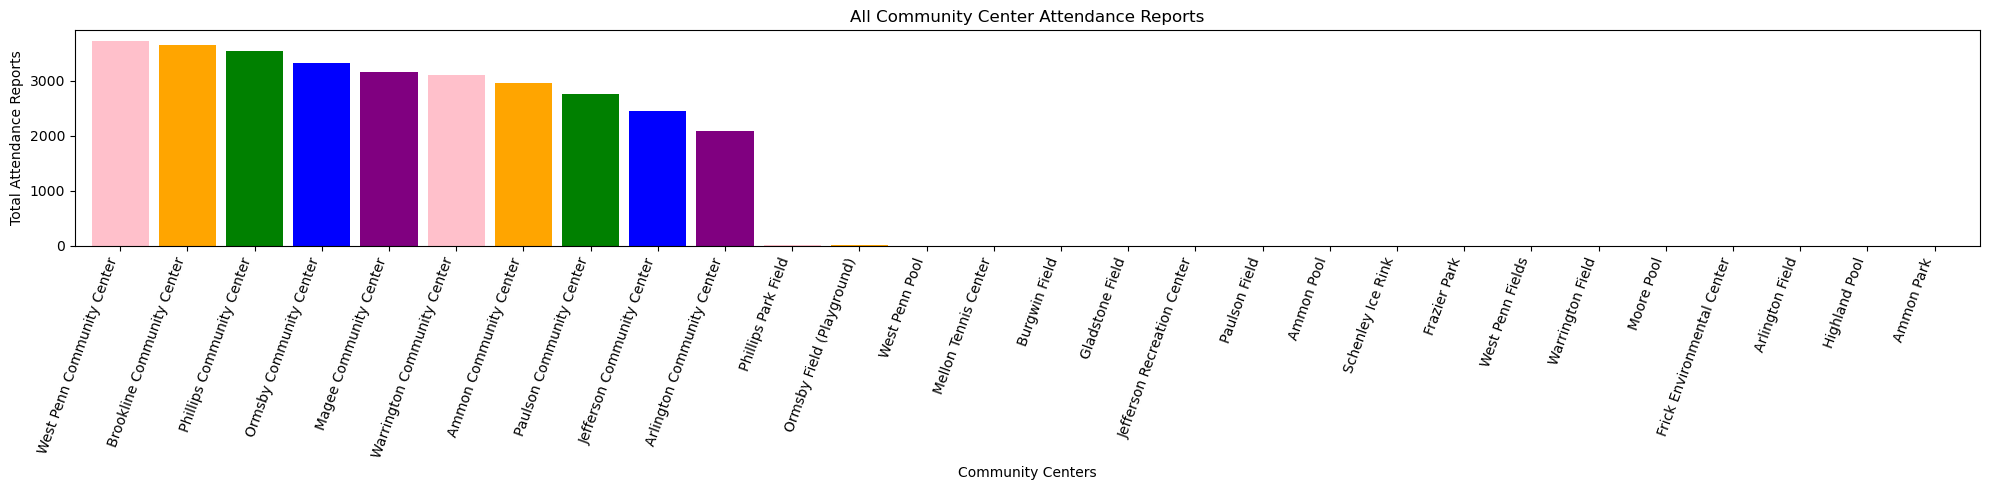

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Get data from CSV file
data = pd.read_csv("Datasets/Daily_Community_Center_Attendence.csv", index_col="date", parse_dates=True)
# Sort centers by name and plot total counts
centers = data['center_name'].value_counts().sort_values(ascending=False)
colors = ['pink', 'orange', 'green', 'blue', 'purple']
centers.plot(kind='bar', figsize=(20, 5), color=colors, width=0.85)
plt.title("All Community Center Attendance Reports")
plt.xlabel("Community Centers")
plt.ylabel("Total Attendance Reports")
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

### It appears only 10 centers actively report their attendance counts.

In [2]:
centers.head(10)

center_name
West Penn Community Center     3726
Brookline Community Center     3651
Phillips Community Center      3530
Ormsby Community Center        3318
Magee Community Center         3158
Warrington Community Center    3099
Ammon Community Center         2957
Paulson Community Center       2763
Jefferson Community Center     2456
Arlington Community Center     2091
Name: count, dtype: int64

### We must clean the data to filter out non-centers and non-active entries.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'West Penn Community Center'),
  Text(1, 0, 'Brookline Community Center'),
  Text(2, 0, 'Phillips Community Center'),
  Text(3, 0, 'Ormsby Community Center'),
  Text(4, 0, 'Magee Community Center'),
  Text(5, 0, 'Warrington Community Center'),
  Text(6, 0, 'Ammon Community Center'),
  Text(7, 0, 'Paulson Community Center'),
  Text(8, 0, 'Jefferson Community Center'),
  Text(9, 0, 'Arlington Community Center')])

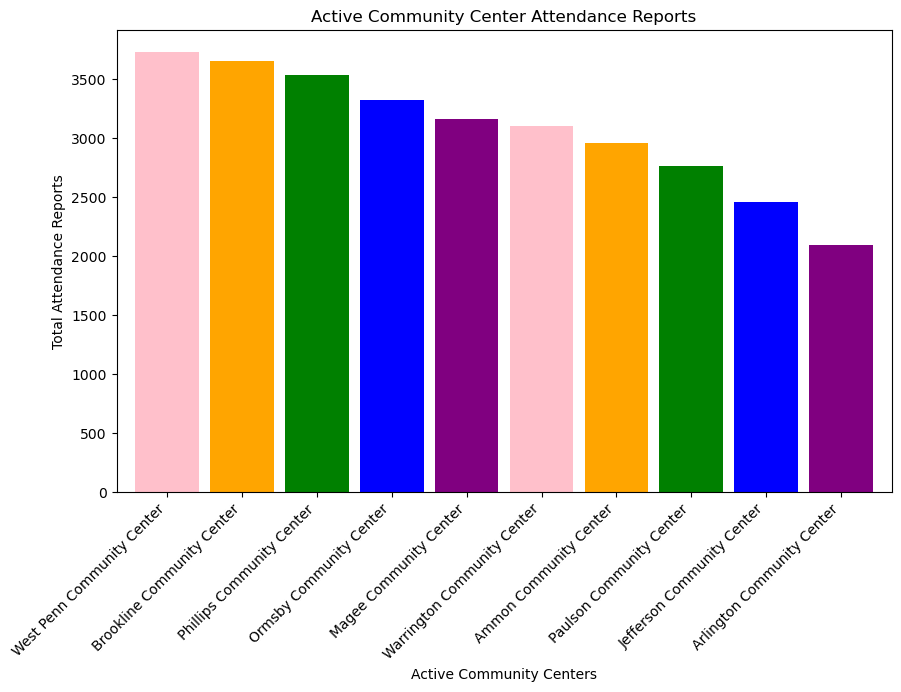

In [4]:
# Filter out nonreporting centers and noncenter entries
def filt(a, threshold):
    if a["attendance_count"].count() > threshold:
        return True
    else:
        return False
active = data.groupby("center_name").filter(filt, threshold=2000)
# Plot active centers' attendance report count
colors = ['pink', 'orange', 'green', 'blue', 'purple']
active['center_name'].value_counts().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10, 6), width=0.85)
plt.title("Active Community Center Attendance Reports")
plt.xlabel("Active Community Centers")
plt.ylabel("Total Attendance Reports")
plt.xticks(rotation=45, ha='right')

## Now let's look at each center's average daily attendance since 2011.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Brookline Community Center'),
  Text(1, 0, 'Phillips Community Center'),
  Text(2, 0, 'West Penn Community Center'),
  Text(3, 0, 'Ammon Community Center'),
  Text(4, 0, 'Warrington Community Center'),
  Text(5, 0, 'Arlington Community Center'),
  Text(6, 0, 'Magee Community Center'),
  Text(7, 0, 'Ormsby Community Center'),
  Text(8, 0, 'Jefferson Community Center'),
  Text(9, 0, 'Paulson Community Center')])

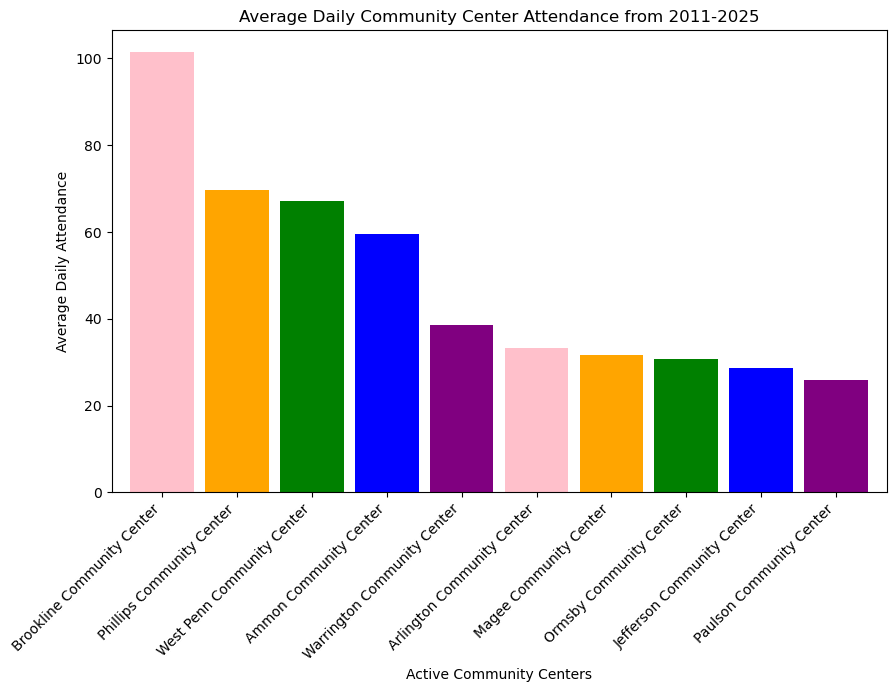

In [5]:
# Plot average daily attendance for each center
colors = ['pink', 'orange', 'green', 'blue', 'purple']
average = active.groupby('center_name')['attendance_count'].mean().sort_values(ascending=False)
average.plot(kind='bar', color=colors, figsize=(10, 6), width=0.85)
plt.title("Average Daily Community Center Attendance from 2011-2025")
plt.xlabel("Active Community Centers")
plt.ylabel("Average Daily Attendance")
plt.xticks(rotation=45, ha='right')

In [6]:
print(average)

center_name
Brookline Community Center     101.408929
Phillips Community Center       69.755807
West Penn Community Center      67.221685
Ammon Community Center          59.467704
Warrington Community Center     38.587932
Arlington Community Center      33.231946
Magee Community Center          31.616529
Ormsby Community Center         30.783605
Jefferson Community Center      28.610342
Paulson Community Center        25.917843
Name: attendance_count, dtype: float64


### Brookline Community Center, located in Brookline, has the highest average daily attendance (~101 attendees). However, this average is over the course of 2011-2025.
## Let's look at which centers' attendance may be growing or diminishing.

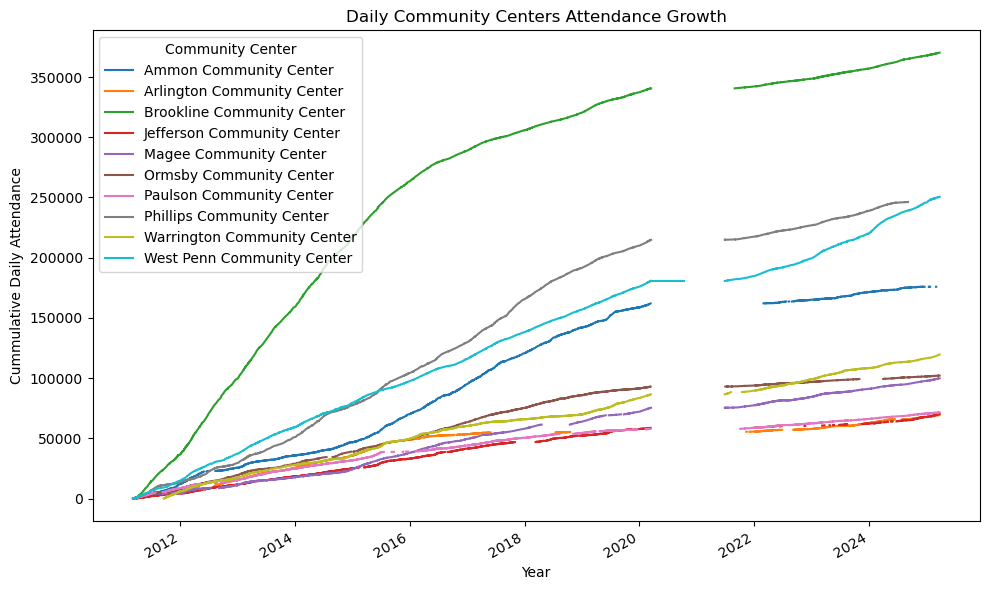

In [9]:
# Pivot and plot data in line graph
pivot = active.pivot(columns="center_name", values="attendance_count")
pivot.cumsum().plot(figsize=(10, 6))
plt.title("Daily Community Centers Attendance Growth")
plt.xlabel("Year")
plt.ylabel("Cummulative Daily Attendance")
plt.legend(title='Community Center', loc='upper left')
plt.tight_layout()

### It appears Brookline was rapidly increasing its daily attendance from 2013-2015, but is not increasing as steeply anymore. Other contenders include Ormsby Community Center (South Side), West Penn Community Center (Polish Hill), and Ammon Community Center (Hill District).
## Finally, let's look at how daily attendance has fluctuated over the years.

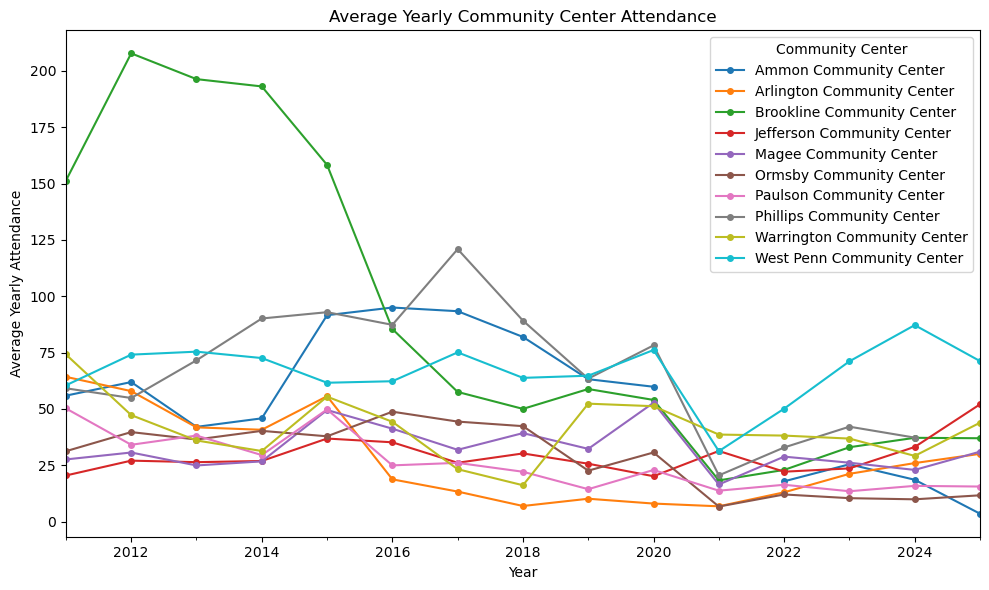

In [10]:
# Plot average yearly attendance for each center
pivot.resample("Y").mean().plot(figsize=(10,6),  marker='o', markersize=4)
plt.title("Average Yearly Community Center Attendance")
plt.xlabel("Year")
plt.ylabel("Average Yearly Attendance")
plt.legend(title='Community Center')
plt.tight_layout()

### On this graph, Brookline begins as the highest yearly average attendance, but dwindles over the years. After all centers face low attendance during Covid, West Penn Community Center emerges as the leader in yearly average attendance.

## Conclusion
The most strongly attended community center in recent years is **West Penn Community Center** which is located in the **Polish Hill**  neighborhood. Thus, **Polish Hill** is most community-oriented, active, and therefore **happiest neighborhood**.

I have never been to Polish Hill personally besides driving through it. This neighborhood was not previously on my radar for being the happiest. Yet, it is unsurprising that I, as an outsider, would not feel how connected and happy residents of Polish Hill are.

## Crime Rates
***

Safety plays a major role in how happy people feel in their neighborhoods. A place with fewer serious crimes can contribute to better mental health, stronger community ties, and a greater sense of peace.

This analysis is focused on the number and severity of arrests in each Pittsburgh neighborhood over the past three years (2021–2023).

## Methodology: Weighted Arrests by Crime Severity

To better reflect the seriousness of arrests, each crime was assigned a numerical weight based on its severity. Higher weights were given to more violent or harmful offenses.

Crime weights:
- Homicide: 5  
- Aggravated Assault / Robbery: 4  
- Burglary: 3  
- Theft / Drug Offenses: 2  
- Disorderly Conduct / Public Drunkenness / Other: 1  

Neighborhoods were then scored based on the total sum of these weighted values over a 3-year period.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Datasets/Pittsburgh_Police_Arrest_Data.csv")
df['OFFENSES'] = df['OFFENSES'].fillna("")
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'], errors='coerce')
df['ARREST_YEAR'] = df['ARRESTTIME'].dt.year

In [7]:
crime_weights = {
    'Homicide': 5,
    'Aggravated Assault': 4,
    'Robbery': 4,
    'Burglary': 3,
    'Theft': 2,
    'Drug': 2,
    'Disorderly Conduct': 1,
    'Public Drunkenness': 1,
    'Other': 1
}

def classify_crime(offense_str):
    offense_str = offense_str.lower()
    if 'homicide' in offense_str:
        return 'Homicide'
    elif 'aggravated assault' in offense_str:
        return 'Aggravated Assault'
    elif 'robbery' in offense_str:
        return 'Robbery'
    elif 'burglary' in offense_str:
        return 'Burglary'
    elif 'theft' in offense_str:
        return 'Theft'
    elif 'drug' in offense_str or 'controlled substance' in offense_str:
        return 'Drug'
    elif 'disorderly conduct' in offense_str:
        return 'Disorderly Conduct'
    elif 'drunkenness' in offense_str:
        return 'Public Drunkenness'
    else:
        return 'Other'

df['CRIME_CATEGORY'] = df['OFFENSES'].apply(classify_crime)
df['CRIME_WEIGHT'] = df['CRIME_CATEGORY'].map(crime_weights)

In [8]:
latest_year = df['ARREST_YEAR'].max()
recent_df = df[df['ARREST_YEAR'].between(latest_year - 2, latest_year)]

score_by_neighborhood = recent_df.groupby('INCIDENTNEIGHBORHOOD')['CRIME_WEIGHT'].sum().dropna()
score_by_neighborhood = score_by_neighborhood[score_by_neighborhood.index != 'Outside City']
score_by_neighborhood = score_by_neighborhood.sort_values()

### Top 15 Safest Neighborhoods 

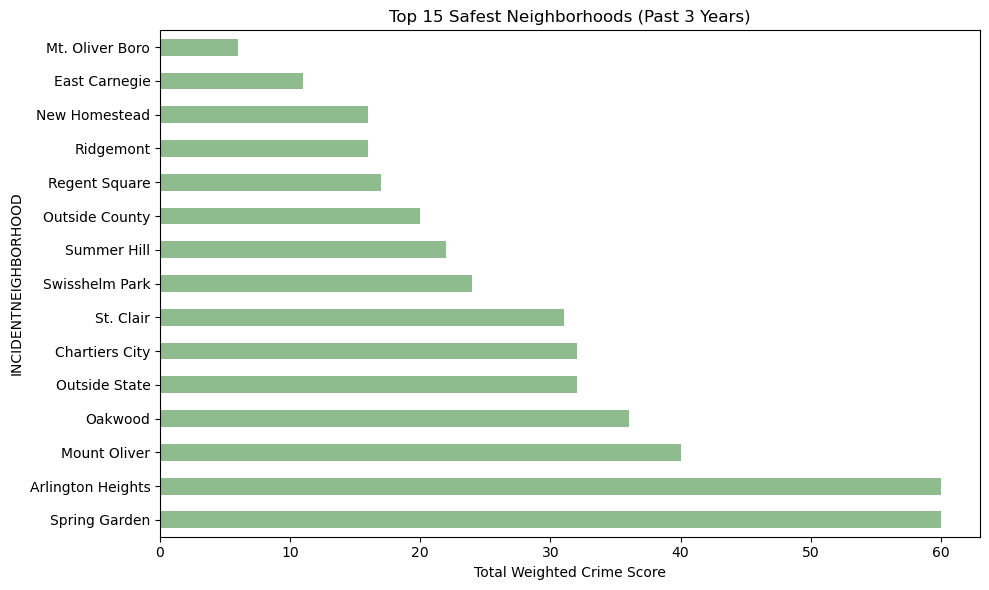

In [9]:
top_safe = score_by_neighborhood.head(15)
plt.figure(figsize=(10, 6))
top_safe.plot(kind='barh',color = "darkseagreen", title="Top 15 Safest Neighborhoods (Past 3 Years)")
plt.xlabel("Total Weighted Crime Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Top 15 Most Dangerous Neighorhoods

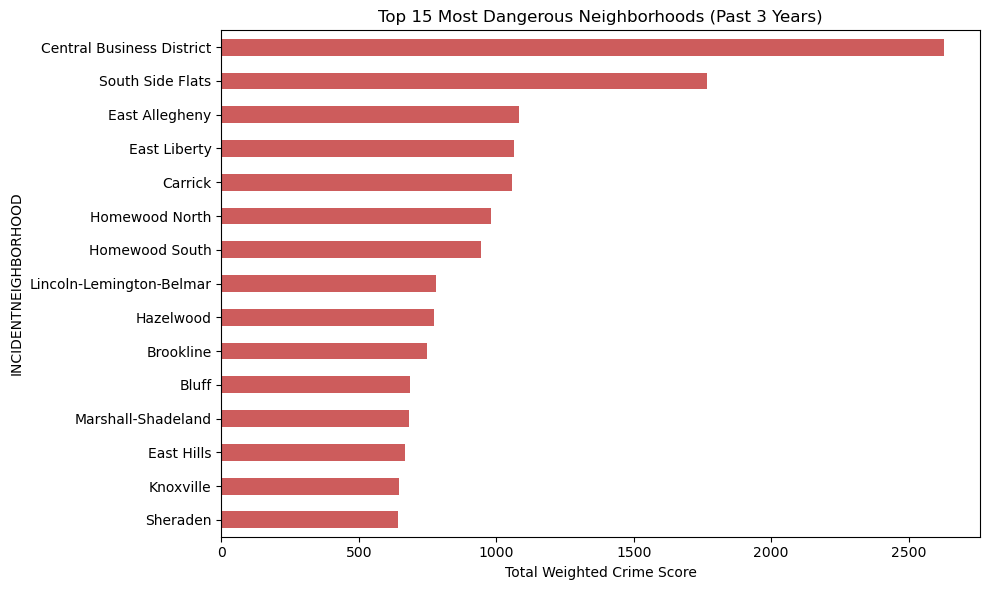

In [10]:
top_dangerous = score_by_neighborhood.tail(15).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_dangerous.plot(kind='barh', color='indianred', title="Top 15 Most Dangerous Neighborhoods (Past 3 Years)")
plt.xlabel("Total Weighted Crime Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Table: Safest vs Dangerous

In [11]:
safe_df = top_safe.reset_index().rename(columns={'INCIDENTNEIGHBORHOOD': 'Neighborhood', 'CRIME_WEIGHT': 'Crime Score'})
dangerous_df = top_dangerous.reset_index().rename(columns={'INCIDENTNEIGHBORHOOD': 'Neighborhood', 'Crime Score': 'Crime Score'})
comparison_df = pd.concat([
    safe_df.assign(Category="Safest"),
    dangerous_df.assign(Category="Most Dangerous")
])
comparison_df

,Neighborhood,Crime Score,Category,CRIME_WEIGHT
0,Mt. Oliver Boro,6.0,Safest,NaN
1,East Carnegie,11.0,Safest,NaN
2,New Homestead,16.0,Safest,NaN
3,Ridgemont,16.0,Safest,NaN
4,Regent Square,17.0,Safest,NaN
5,Outside County,20.0,Safest,NaN
6,Summer Hill,22.0,Safest,NaN
7,Swisshelm Park,24.0,Safest,NaN
8,St. Clair,31.0,Safest,NaN
9,Chartiers City,32.0,Safest,NaN


### Crime Trends Over Time

To assess consistency in safety, weighted crime scores were also examined over a three-year period for selected neighborhoods. This time series visualization highlights how arrest severity has changed from year to year.

Neighborhoods with stable or declining crime scores demonstrate sustained levels of safety, while those with rising scores may indicate emerging concerns. Tracking these patterns offers insight into whether a neighborhood’s safety is improving, deteriorating, or remaining consistent.


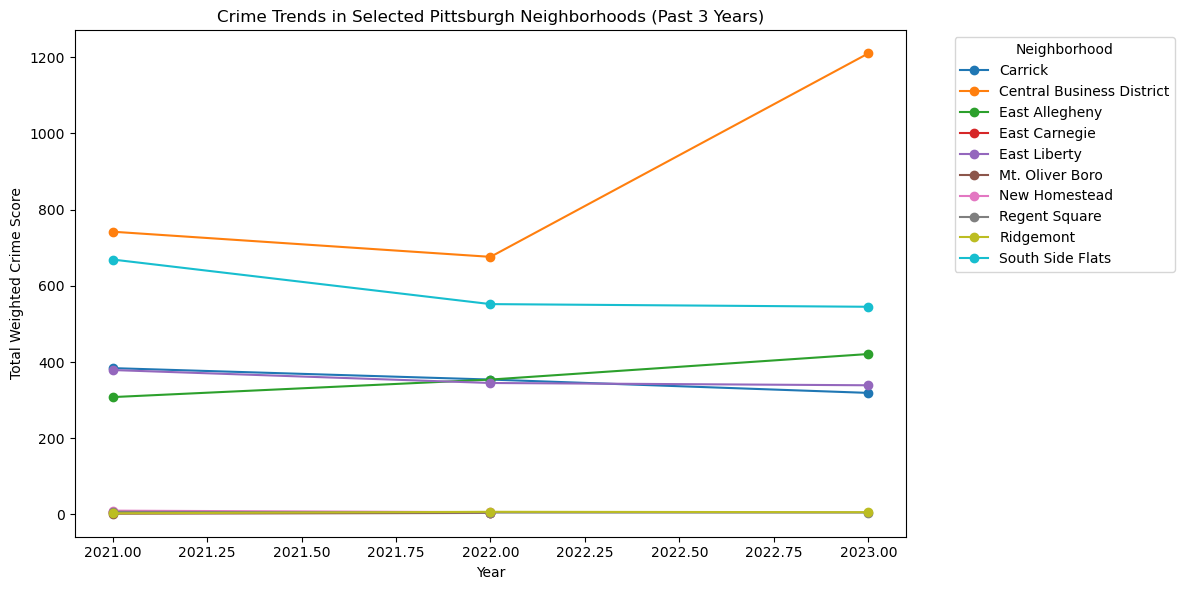

In [12]:
trend_df = recent_df.groupby(['INCIDENTNEIGHBORHOOD', 'ARREST_YEAR'])['CRIME_WEIGHT'].sum().reset_index()
selected_neighs = top_safe.head(5).index.tolist() + top_dangerous.head(5).index.tolist()
trend_df = trend_df[trend_df['INCIDENTNEIGHBORHOOD'].isin(selected_neighs)]

plt.figure(figsize=(12, 6))

for neighborhood in trend_df['INCIDENTNEIGHBORHOOD'].unique():
    subset = trend_df[trend_df['INCIDENTNEIGHBORHOOD'] == neighborhood]
    plt.plot(subset['ARREST_YEAR'], subset['CRIME_WEIGHT'], marker='o', label=neighborhood)

plt.title("Crime Trends in Selected Pittsburgh Neighborhoods (Past 3 Years)")
plt.xlabel("Year")
plt.ylabel("Total Weighted Crime Score")
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Conclusion

Based on a three-year analysis of weighted arrest data, **Mt. Oliver Boro** had the lowest overall crime score among all Pittsburgh neighborhoods. This score reflects both a low number of arrests and a minimal presence of high-severity offenses, indicating a safer community environment.

Given the strong connection between public safety and overall well-being, Mt. Oliver Boro ranks as the **safest** neighborhood according to this analysis. As a result, it is considered the **happiest** neighborhood in Pittsburgh.


# Fire Rates
Our group decided our metric would be happiness. And the neighborhood with the least fires is the happiest right? Just look at that little dog down there. He's really trying to keep himself composed. I wouldn't want to live in his neighborhood!

The information used was collected from 2013 to the present, so everything discussed below is within this timeframe.

![dog](https://cdn.hashnode.com/res/hashnode/image/upload/v1658971443881/Q9WWvH0Cv.gif?auto=format,compress&gif-q=60&format=webm)

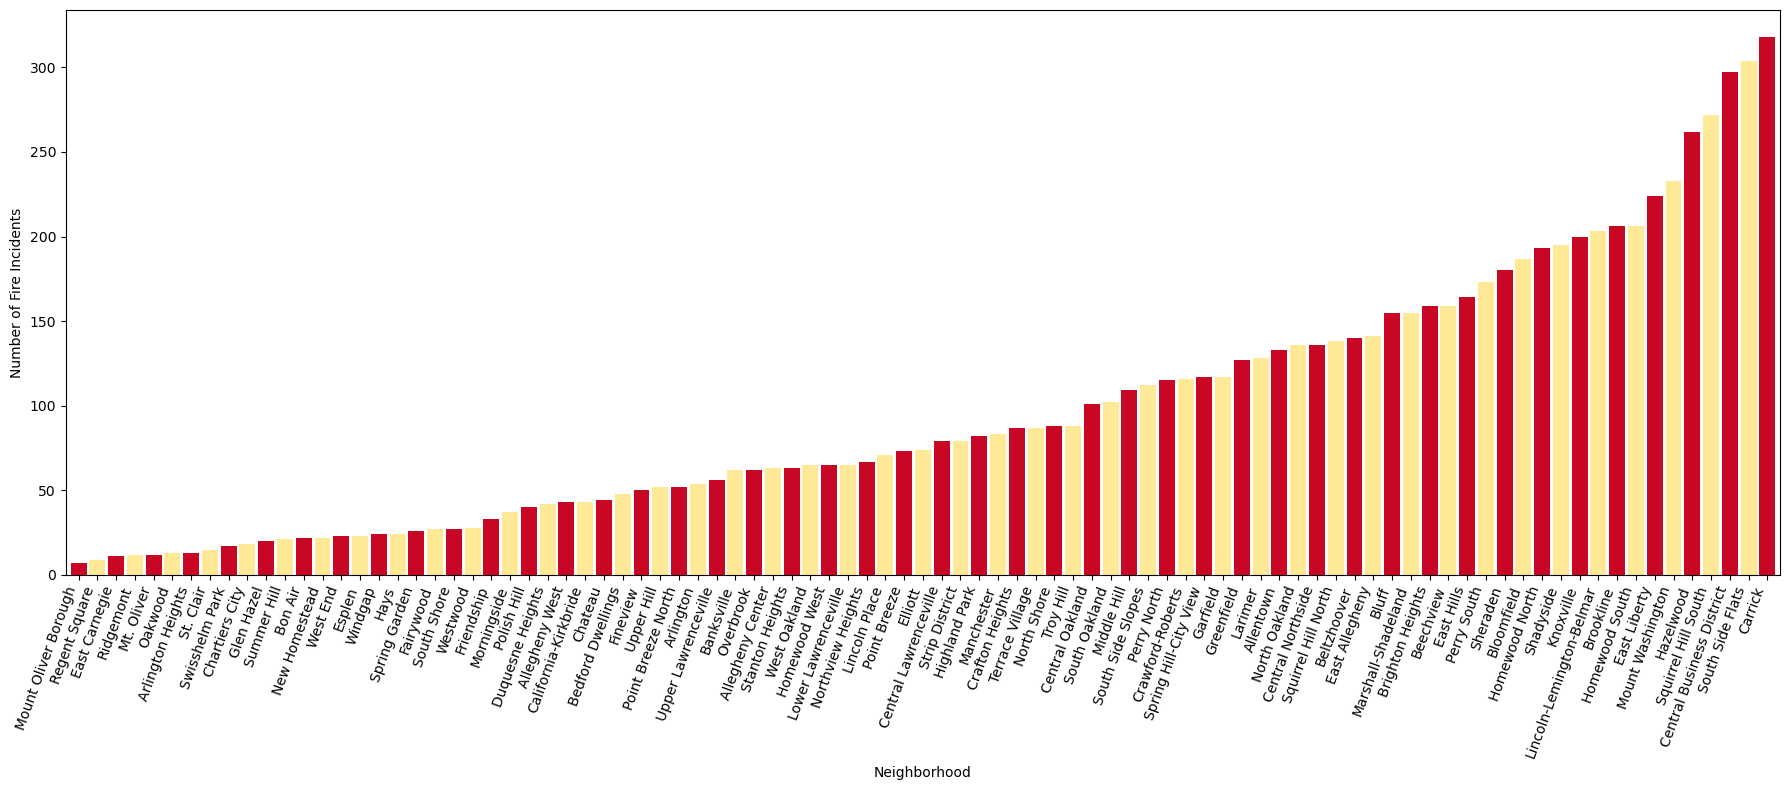

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Fire_Incidents.csv")
fires = data['neighborhood'].value_counts().sort_values(ascending=True)
colors = ['#C70723' if i % 2 == 0 else '#FFE997' for i in range(len(fires))]
fires.plot(kind='bar', color=colors, figsize=(18, 8),width=0.85)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Fire Incidents")
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

Wow those are a lot of fires! I'd be pretty worried if I was in South Side Flats or Carrick! Lets's just focus on the fewest 10.

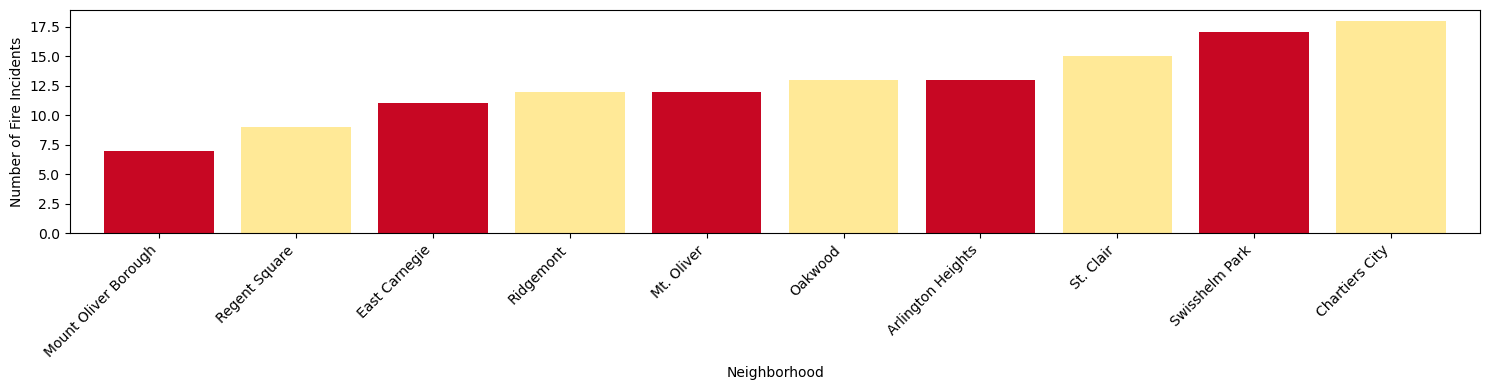

In [2]:
fires = data['neighborhood'].value_counts().sort_values(ascending=True).head(10)
colors = ['#C70723' if i % 2 == 0 else '#FFE997' for i in range(len(fires))]
fires.plot(kind='bar', color=colors, figsize=(15, 4), width=0.8)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Fire Incidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
firetable = fires.reset_index()
firetable.columns = ['Neighborhood', '  Number of Incidents']
print(firetable.to_string(index=False))

        Neighborhood    Number of Incidents
Mount Oliver Borough                      7
       Regent Square                      9
       East Carnegie                     11
           Ridgemont                     12
          Mt. Oliver                     12
             Oakwood                     13
   Arlington Heights                     13
           St. Clair                     15
      Swisshelm Park                     17
      Chartiers City                     18


If our rating was based soley on the number of fires, Mount Oliver Borough would win with 7 incidents from 2013 until now. But couldn't happiness also be influenced by the intensity of fires within each neighborhood?

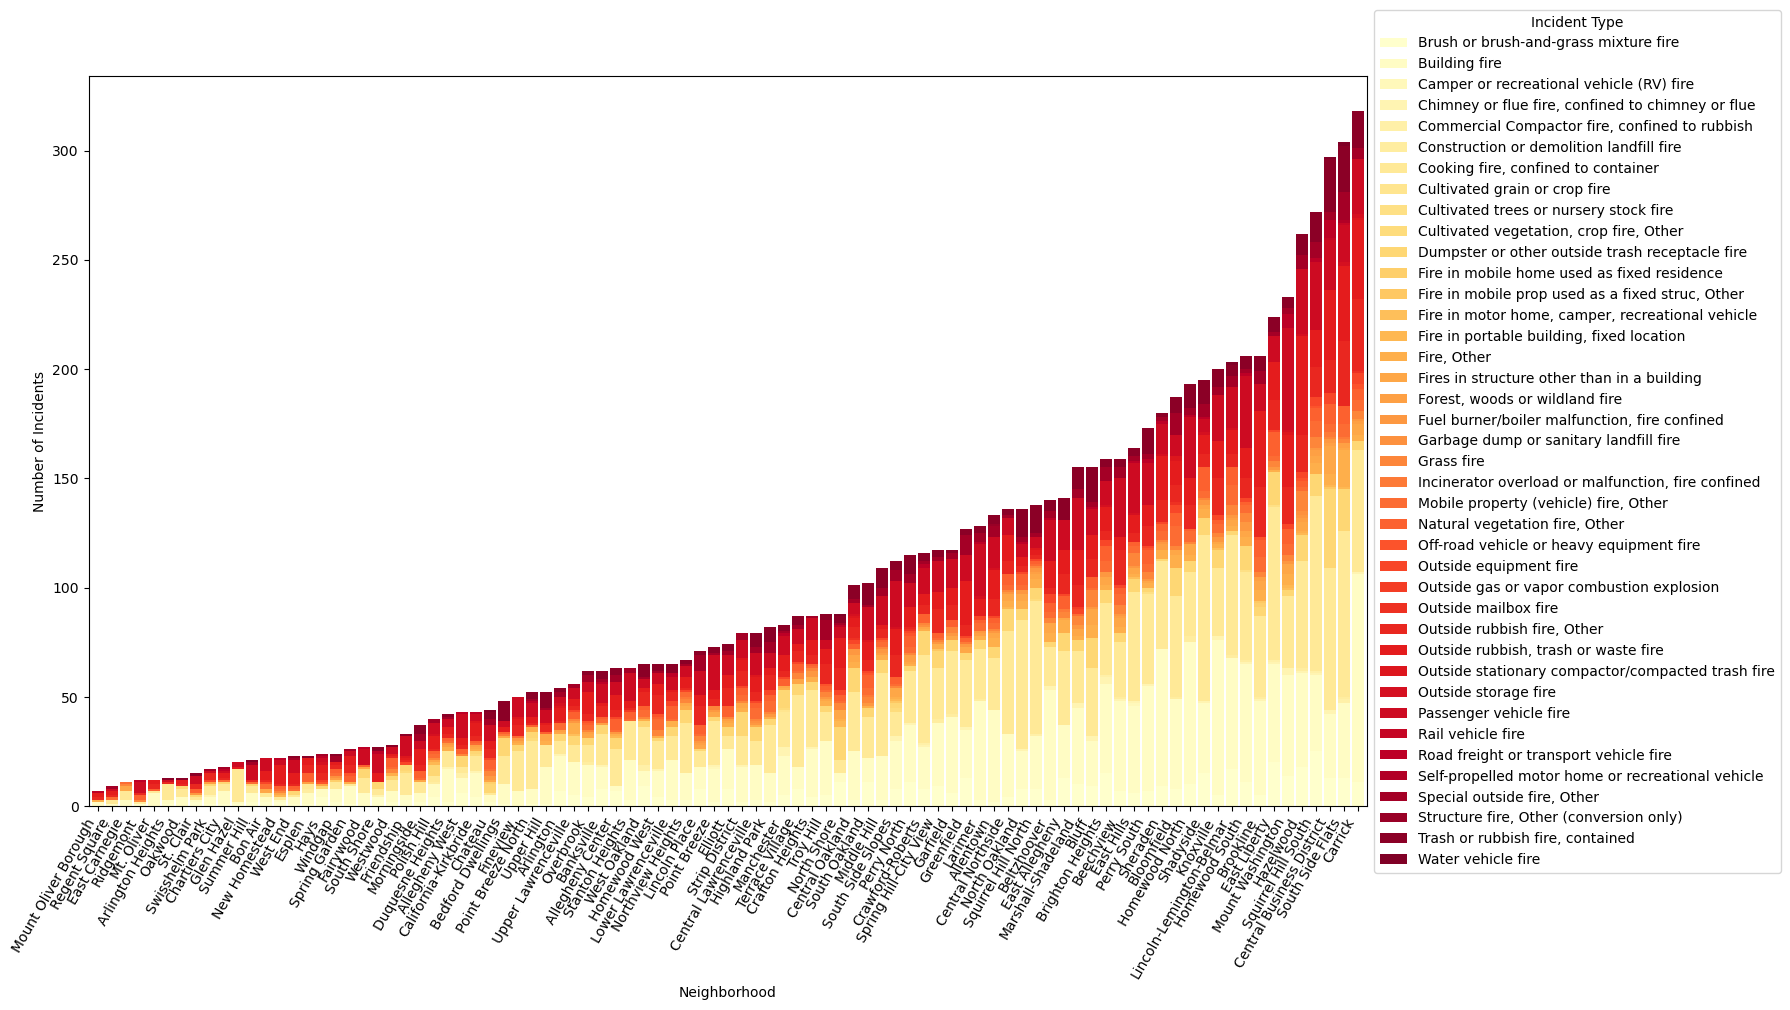

In [4]:
incidents = data.groupby(['neighborhood', 'type_description']).size().unstack(fill_value=0)
incidents = incidents.loc[incidents.sum(axis=1).sort_values(ascending=True).index]
incidents.plot(kind='bar',stacked=True,figsize=(18, 10),colormap='YlOrRd',width=0.85)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=60, ha='right')
plt.legend(title='Incident Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

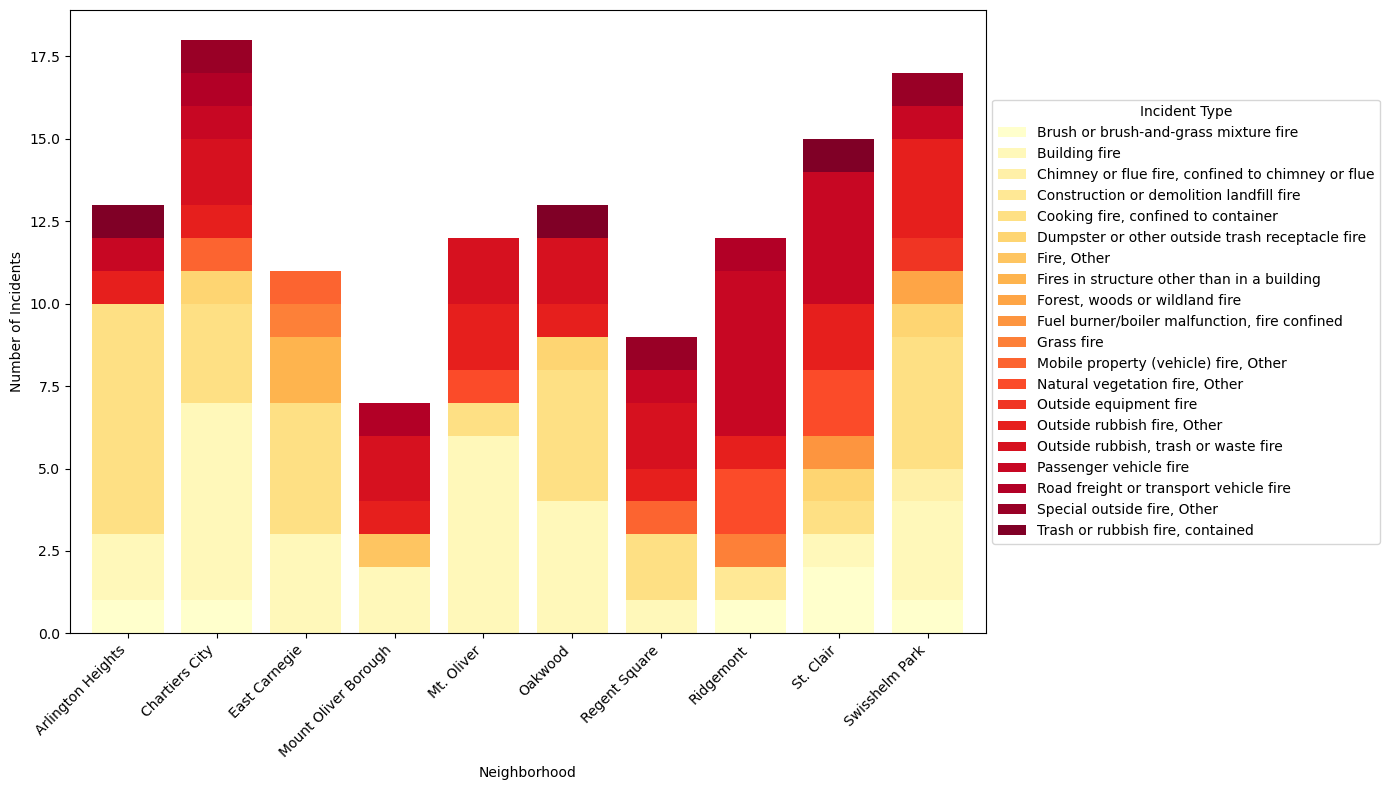

In [5]:
tenneighborhoods = data['neighborhood'].value_counts().sort_values().head(10).index
filterdata = data[data['neighborhood'].isin(tenneighborhoods)]
incidentbreakdown = filterdata.groupby(['neighborhood', 'type_description']).size().unstack(fill_value=0)
incidentbreakdown.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='YlOrRd', width=0.8)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incident Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

A mailbox fire isn't going to be as deadly as an demolition fire, so let's assign some weights based on severity. This kind of thing can be pretty subjective. On average, I assigned most of the trash related fires to lower weights and ones related to vehicles or other heavy machinery to higher weights.

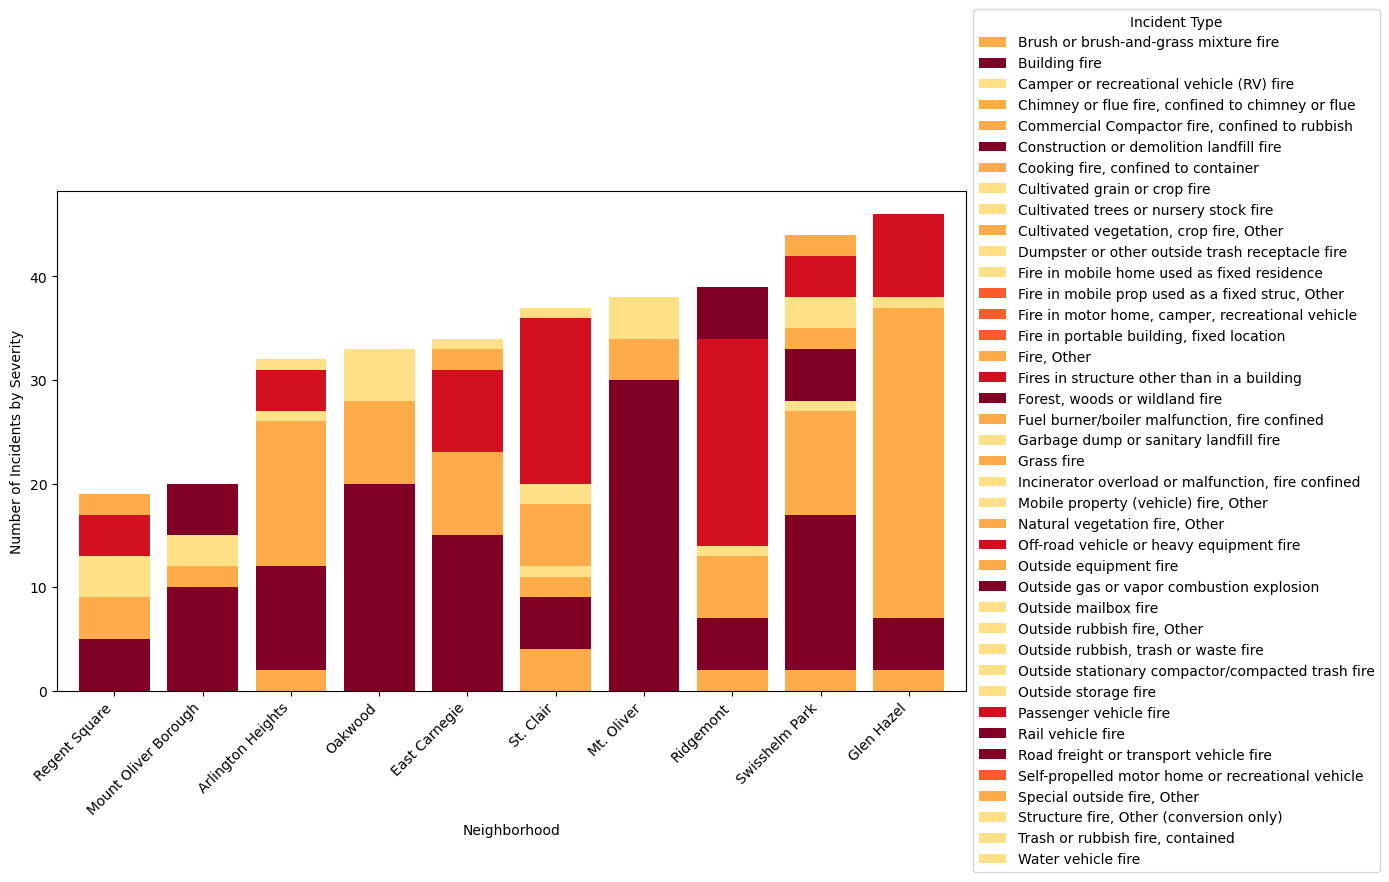

In [10]:
weights = {
    'Building fire': 5,
    'Passenger vehicle fire': 4,
    'Construction or demolition landfill fire': 5,
    'Commercial Compactor fire, confined to rubbish': 2,
    'Cooking fire, confined to container': 2,
    'Trash or rubbish fire, contained': 1,
    'Brush or brush-and-grass mixture fire': 2,
    'Forest, woods or wildland fire': 5,
    'Grass fire': 2,
    'Fuel burner/boiler malfunction, fire confined': 2,
    'Dumpster or other outside trash receptacle fire': 1,
    'Outside rubbish fire, Other': 1,
    'Outside rubbish, trash or waste fire': 1,
    'Fire, Other': 2,
    'Special outside fire, Other': 2,
    'Natural vegetation fire, Other': 2,
    'Off-road vehicle or heavy equipment fire': 4,
    'Rail vehicle fire': 5,
    'Road freight or transport vehicle fire': 5,
    'Self-propelled motor home or recreational vehicle': 3,
    'Fire in motor home, camper, recreational vehicle': 3,
    'Fire in mobile prop used as a fixed struc, Other': 3,
    'Fire in portable building, fixed location': 3,
    'Outside equipment fire': 2,
    'Fires in structure other than in a building': 4,
    'Chimney or flue fire, confined to chimney or flue': 2,
    'Outside gas or vapor combustion explosion': 5,
    'Cultivated vegetation, crop fire, Other': 2,
    'Outside mailbox fire': 1,
    'Water vehicle fire:': 2,
}
data['weights'] = data['type_description'].map(weights).fillna(1)
weighted = data.groupby(['neighborhood', 'type_description'])['weights'].sum().unstack(fill_value=0)
weighted = weighted.loc[weighted.sum(axis=1).sort_values(ascending=True).head(10).index]
incidenttypes = weighted.columns
colors = [plt.cm.YlOrRd(weights.get(i, 1) / 5) for i in incidenttypes]
weightgraph = weighted.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors, width=0.8)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents by Severity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incident Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

Regent Square takes the win in this category, but Mount Oliver Borough isn't so far behind with second place.

## Conclusion
Based on these metrics, we can say that Mount Oliver Borough has the least fires, and low fire severity, which makes it the happiest neighborhood.

I've never been to Mount Oliver Borough, or much of anywhere in Pittsburgh, but it looks homey, and with all its trees it's a good thing there aren't many fires!

# Final Conclusions
***